# West Nile Virus in Chicago: Location
---

## Content
---

- [Locations](../code/99_Locations.ipynb) **Current Notebook**
- [Data Cleaning Summary](../code/01_Data_Cleaning.ipynb) 
- [Train-test Investigation](../code/01a_Train_Test_Investigation.ipynb)
- [Weather Investigation](../code/01b_Weather_Investigation.ipynb)
- [Spray Investigation](../code/01c_Spray_Investigation.ipynb)
- [Feature Engineering](../code/02a_Feature_Engineering.ipynb)
- [Combined EDA and Preprocessing](../code/02b_Combined_EDA_and_Preprocessing.ipynb)
- [Model Tuning & Conclusion](../code/03_Model_Tuning_&_Conclusion.ipynb)

This is an example of developing a script locally with the West Nile Virus data to share on Kaggle
Once you have a script you're ready to share, paste your code into a [new script](https://www.kaggle.com/c/predict-west-nile-virus/scripts/new).

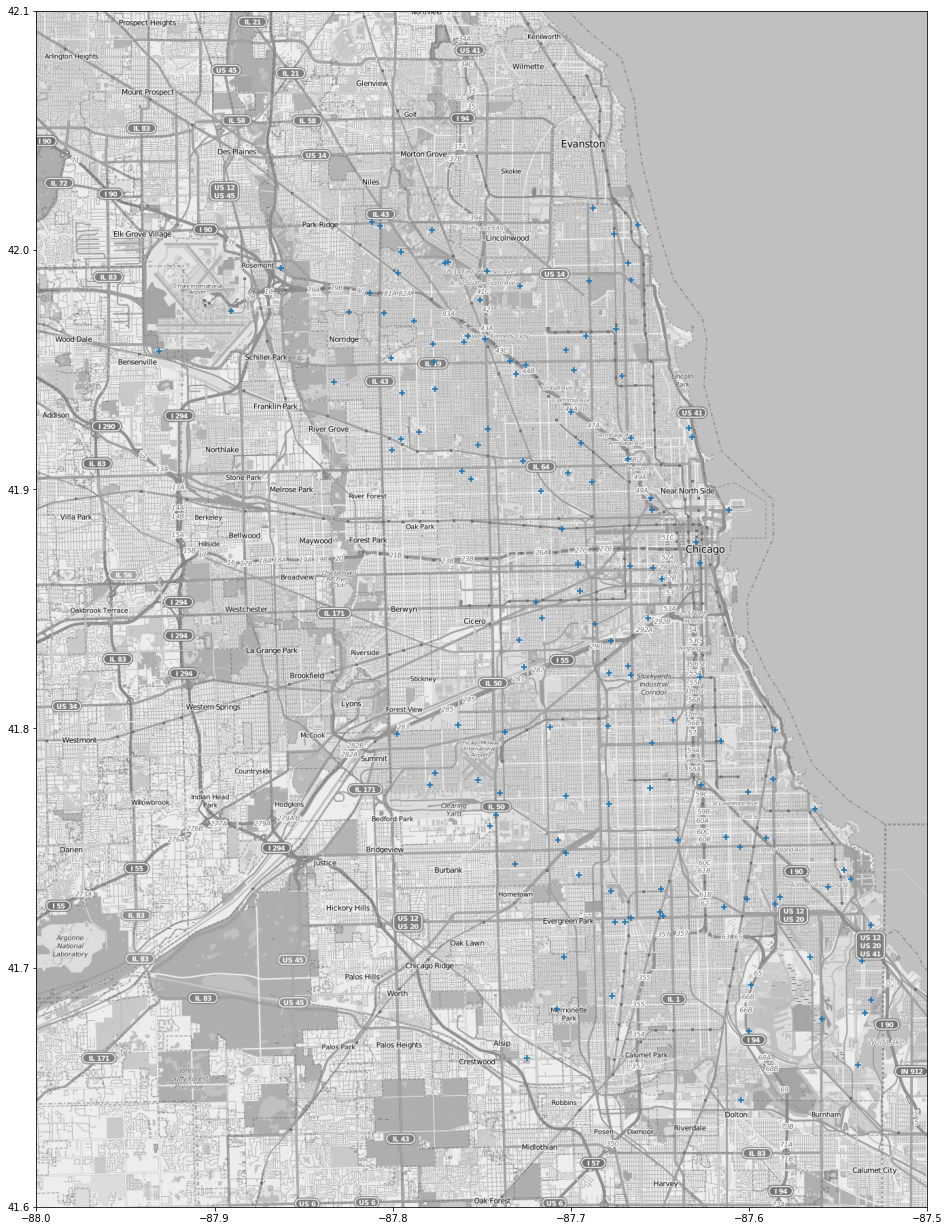

In [ ]:
# Code is borrowed from: https://www.kaggle.com/users/213536/vasco/predict-west-nile-virus/west-nile-heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Remove this when copying to a script on Kaggle:
%matplotlib inline 

mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../assets/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(18,22))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='+')

# Add this when copying to a script on Kaggle:
#plt.savefig('heatmap.png')

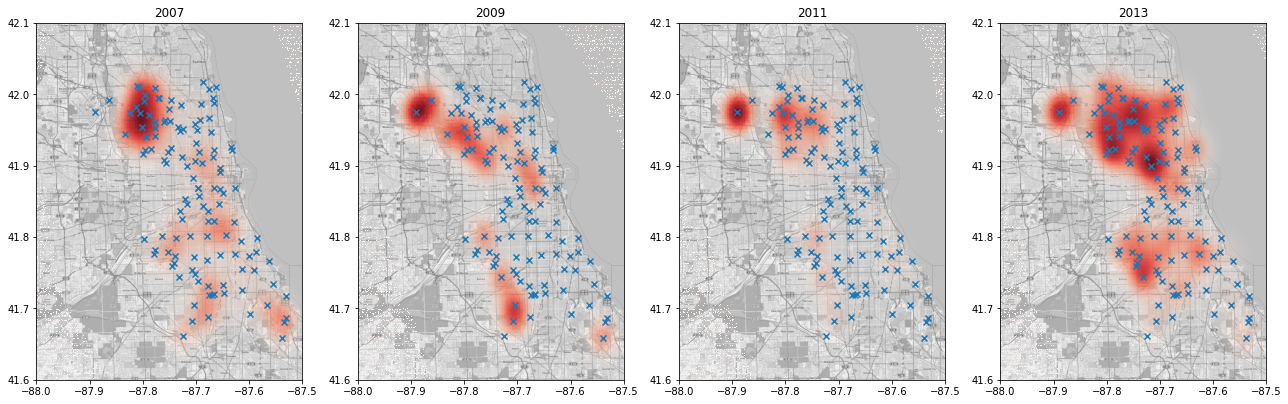

In [ ]:
#source: https://www.kaggle.com/neilsummers/west-nile-heatmap-by-year
import pandas as pd
import numpy as np

import matplotlib.pyplot as pl
#%matplotlib inline

from sklearn.neighbors import KernelDensity

mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../assets/cleaned_train.csv', parse_dates=['Date'])[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

alpha_cm = pl.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

pl.figure(figsize=(18,6))
for year, subplot in zip([2007, 2009, 2011, 2013], [141, 142, 143, 144]):
    sightings = traps[(traps['WnvPresent'] > 0) & (traps['Date'].apply(lambda x: x.year) == year)]
    sightings = sightings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
    X = sightings[['Longitude', 'Latitude']].values
    kd = KernelDensity(bandwidth=0.02)
    kd.fit(X)

    xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(),yv.ravel()]).T
    zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
    pl.subplot(subplot)
    pl.gca().set_title(year)
    pl.imshow(mapdata, 
               cmap=pl.get_cmap('gray'), 
               extent=lon_lat_box, 
               aspect=aspect)
    pl.imshow(zv, 
               origin='lower', 
               cmap=alpha_cm, 
               extent=lon_lat_box, 
               aspect=aspect)
    pl.tight_layout()
    locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
    pl.scatter(locations[:,0], locations[:,1], marker='x')